In [1]:
# pip install numpy

In [2]:
import pandas as pd 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the dataset from the csv file # separator is a vertical line, as seen in the dataset 
df = pd.read_excel('/Users/rehas./BIA LECTURES NOTES/ML/iris.xlsx')

In [5]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [6]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

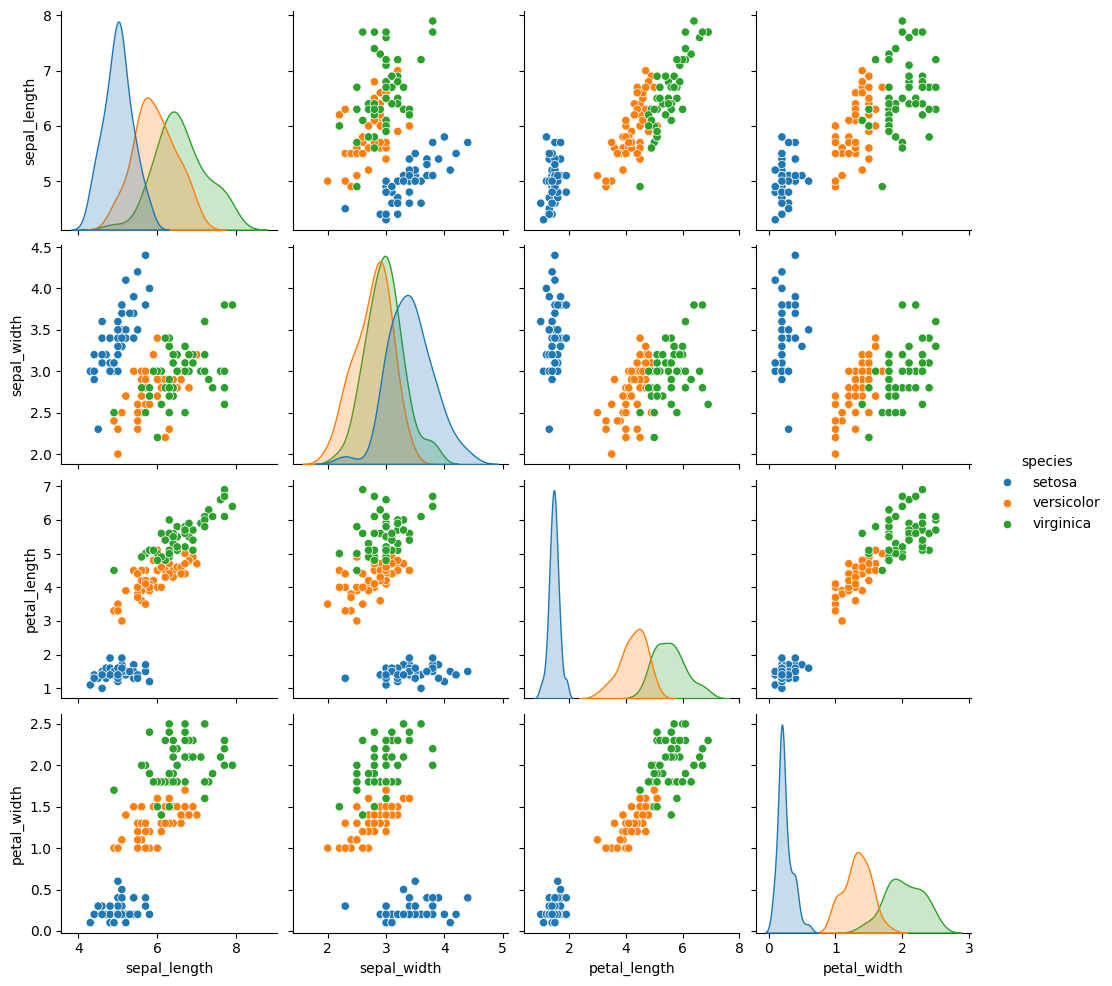

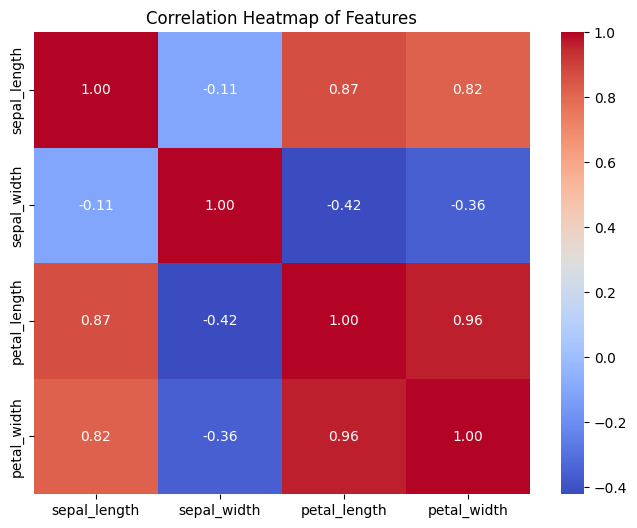

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'species' column to categorical type
df['species'] = df['species'].astype('category')

# Retry the pairplot with the corrected data
sns.pairplot(df, hue='species')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
corr_matrix = df.iloc[:, :-1].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()


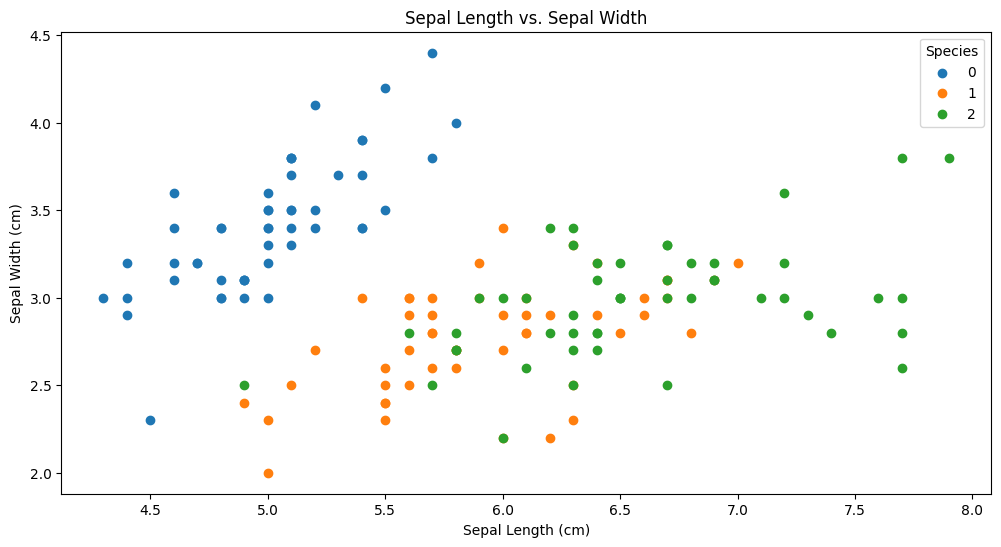

In [10]:
# Scatter plot of the features colored by class
plt.figure(figsize=(12, 6))
for species, species_data in df.groupby('species'):
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

In [11]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [12]:
X = df.drop('species', axis=1)
y = df['species']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize the AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada_model.predict(X_test)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {ada_accuracy * 100:.2f}%")


AdaBoost Accuracy: 100.00%


In [3]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/opt/anaconda3/envs/reha/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B9202094-7D52-318C-99CF-7034B0E9F28D> /opt/anaconda3/envs/reha/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/anaconda3/envs/reha/lib/python3.12/lib-dynload/../../libomp.dylib' (no such file), '/opt/anaconda3/envs/reha/bin/../lib/libomp.dylib' (no such file)"]


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"


NameError: name 'bash' is not defined